In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mp
import csv

In [2]:
# to read the CSV file
train = pd.read_csv('mnist_train.csv')

In [3]:
# to release those rows with the information of the selected number
num = 5; p = 2; r = 20; c = 20; n = r*c
trn = train.drop(train[train['label']>num].index)
trn = trn.drop(trn[trn['label']<num].index)
trn.drop(['label'],axis=1,inplace=True)

In [4]:
# to convert the data from CSV to array for easier operations
train_new = np.array(trn)
train_new.shape

(5421, 784)

In [5]:
# to select n images for training
t = train_new[0:n,:]
t.shape

(400, 784)

The mean image is as below.


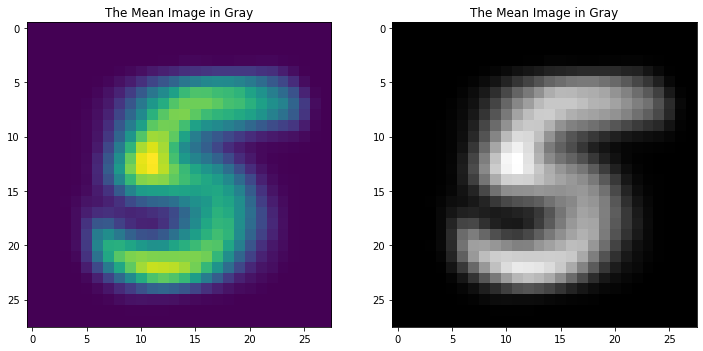

In [6]:
# to compute the mean image
m = np.mean(t, axis=0)
w = np.sqrt(t.shape[1]).astype('int')
mean_img = m.reshape(w,w)
fig1 = plt.figure(figsize=(12,12))
ax = fig1.add_subplot(121, title='The Mean Image in Gray')
plt.imshow(mean_img)
ax = fig1.add_subplot(122, title='The Mean Image in Gray')
plt.imshow(mean_img, cmap='gray')
print('The mean image is as below.')

In [7]:
# to compute the center matrix by calculate the differences between each row with the mean value
diff = t - m.T

In [8]:
# to calculate the covariance of center matrix
cov = np.cov(diff.T)
# to calculate the eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors=  np.linalg.eig(cov)

In [9]:
print('Eigenvalues =\n\n', eigenvalues, '\n\nThe length of its matrix is', eigenvalues.shape[0])
print('\nEigenvectors =\n\n', eigenvectors, '\n\nThe size of its matrix is', eigenvectors.shape)

Eigenvalues =

 [ 5.66812817e+05+0.00000000e+00j  2.69884877e+05+0.00000000e+00j
  2.47653912e+05+0.00000000e+00j  1.47603170e+05+0.00000000e+00j
  1.24665799e+05+0.00000000e+00j  1.12871732e+05+0.00000000e+00j
  9.21416362e+04+0.00000000e+00j  8.36256386e+04+0.00000000e+00j
  7.04064882e+04+0.00000000e+00j  6.66676901e+04+0.00000000e+00j
  6.03914524e+04+0.00000000e+00j  5.56301430e+04+0.00000000e+00j
  5.02280924e+04+0.00000000e+00j  4.38190585e+04+0.00000000e+00j
  4.20024616e+04+0.00000000e+00j  3.88271384e+04+0.00000000e+00j
  3.83129315e+04+0.00000000e+00j  3.71564074e+04+0.00000000e+00j
  3.34227017e+04+0.00000000e+00j  3.25221346e+04+0.00000000e+00j
  3.08585228e+04+0.00000000e+00j  2.74557780e+04+0.00000000e+00j
  2.66928335e+04+0.00000000e+00j  2.52961783e+04+0.00000000e+00j
  2.29688504e+04+0.00000000e+00j  2.26194341e+04+0.00000000e+00j
  2.12986819e+04+0.00000000e+00j  2.04422807e+04+0.00000000e+00j
  1.97228049e+04+0.00000000e+00j  1.82391696e+04+0.00000000e+00j
  1.76487

In [10]:
# to find the eigenvectors associated with the first 2 largest eigenvalues
eigenvalues_index = np.argsort(eigenvalues)[::-1][:p]
select_vectors = eigenvectors[:, eigenvalues_index]

In [11]:
# to compute the PC
PC = np.dot(np.dot(diff, select_vectors), select_vectors.T)
PCA = PC.astype('float')
PCA.shape

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


(400, 784)

>>The result of Mission A.


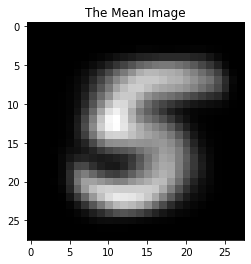

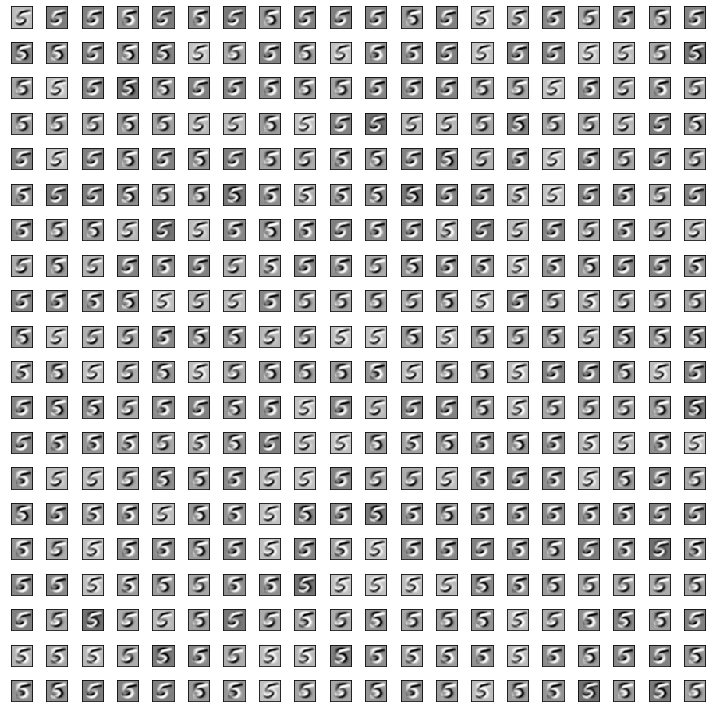

In [12]:
# to display the result of Mission A
print('>>The result of Mission A.')
plt.imshow(mean_img, cmap='gray')
plt.title('The Mean Image')

fig, ax = plt.subplots(figsize=(10,10), nrows=r, ncols=c, sharex=True, sharey=True, )

ax = ax.flatten()
for i in range(n):
    img = PCA[i][:].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

The Test Image


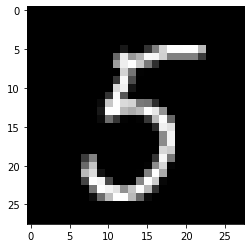

In [13]:
# to read the CSV file (test)
test = pd.read_csv('mnist_test.csv')

# to release those rows with the information of the selected number
num = 5; r = 1; c = 1; n = r*c
tst = test.drop(test[test['label']>num].index)
tst = tst.drop(tst[tst['label']<num].index)
tst.drop(['label'],axis=1,inplace=True)

# to convert the data from CSV to array for easier operations
test_new = np.array(tst)

# to select n images for training
t = test_new[25:25+n,:]
P = t.reshape(28,28).astype('float')
plt.imshow(P, cmap='gray')
print('The Test Image')

The Recon-Image when p=10


C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


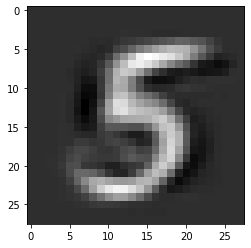

In [14]:
# When P = 10

# to compute the center matrix by calculate the differences between each row with the mean value
diff10 = t - m.T
p = 10

# to find the eigenvectors associated with the first 2 largest eigenvalues
eigenvalues_index = np.argsort(eigenvalues)[::-1][:p]
select_vectors = eigenvectors[:, eigenvalues_index]

# to display the reconstruction of the tast image when p=10
PC10 = np.dot(np.dot(diff10, select_vectors), select_vectors.T) + m
P10 = PC10.reshape(28,28).astype('float')
plt.imshow(P10, cmap='gray')
print('The Recon-Image when p=10')

The Recon-Image when p=50


C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


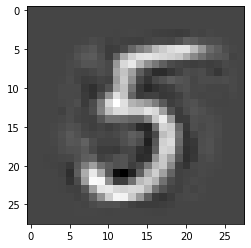

In [15]:
# When P = 50

# to compute the center matrix by calculate the differences between each row with the mean value
diff50 = t - m.T
p = 50

# to find the eigenvectors associated with the first 2 largest eigenvalues
eigenvalues_index = np.argsort(eigenvalues)[::-1][:p]
select_vectors = eigenvectors[:, eigenvalues_index]

# to display the reconstruction of the tast image when p=10
PC50 = np.dot(np.dot(diff50, select_vectors), select_vectors.T) + m
P50 = PC50.reshape(28,28).astype('float')
plt.imshow(P50, cmap='gray')
print('The Recon-Image when p=50')

>>The result of Mission B.


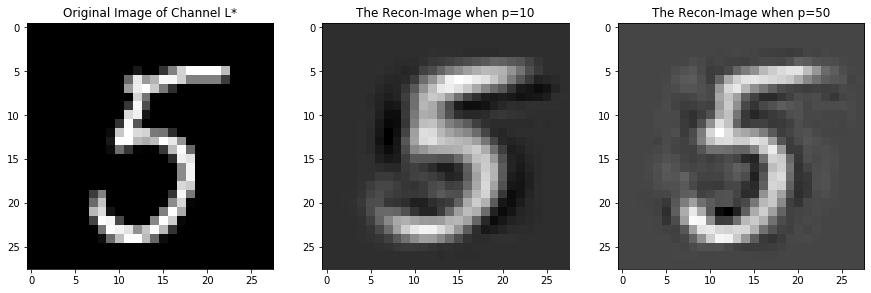

In [16]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(131, title='Original Image of Channel L*')
plt.imshow(P, cmap='gray')
ax = fig.add_subplot(132, title='The Recon-Image when p=10')
plt.imshow(P10, cmap='gray')
ax = fig.add_subplot(133, title='The Recon-Image when p=50')
plt.imshow(P50, cmap='gray')
print('>>The result of Mission B.')

This is the spliced image.


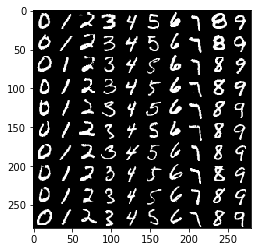

In [24]:
# the process to splice images is saved in Splicing.ipynb
# to load the array of nums
nums = np.load("nums.npy")
plt.imshow(nums, cmap='gray')
print('This is the spliced image.')

In [20]:
# to compute DFFS and SSD when p = 200
p = 200
length = nums.shape[1] +1 - 28

img = np.zeros([w,w])
heat_DFFS = np.zeros([length,length])
heat_SSD = np.zeros([length,length])

eigenvalues_index = np.argsort(eigenvalues)[::-1][:p]
select_vectors = eigenvectors[:, eigenvalues_index]

In [21]:
for i in range(length):
    for j in range(length):
        img = nums[i:i+28,j:j+28]
        timg = img.reshape(1, 784)
        SSD = timg - m.T
        PC = np.dot(np.dot(SSD, select_vectors), select_vectors.T)
        DFFS = timg - PC
        heat_SSD[i][j] = np.sum(np.power(SSD, 2))
        heat_DFFS[i][j] = np.sum(np.power(DFFS, 2))

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


>>The result of Mission C.


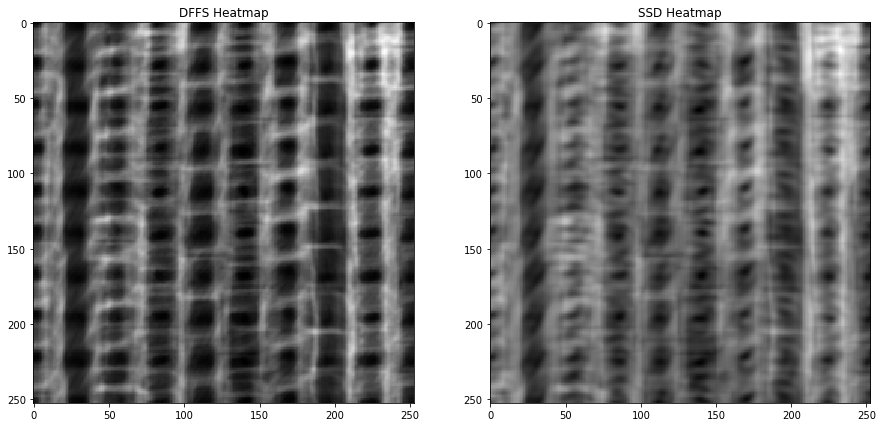

In [25]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(121, title='DFFS Heatmap')
plt.imshow(heat_DFFS, cmap='gray')
ax = fig.add_subplot(122, title='SSD Heatmap')
plt.imshow(heat_SSD, cmap='gray')
print('>>The result of Mission C.')